# Environment setup and Log In to Twitter

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

In [2]:
username = "bot_analysis"
#password = getpass.getpass(prompt = 'Enter your password: ')
password = 'happyduck123'

In [3]:
search_item = "J.I.D"

In [4]:
PATH = "C:\Program Files\drivers\chromedriver.exe"
driver = webdriver.Chrome(PATH)
driver.get("https://twitter.com/i/flow/login")
# driver.maximize_window()
sleep(3)

C:\Users\msnao\AppData\Local\Temp\ipykernel_19884\1073073802.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [5]:
# log in to twitter
user_id = driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(username)
user_id.send_keys(Keys.ENTER)

In [ ]:
password_id = driver.find_element(By.XPATH,"//input[@type='password']")
password_id.send_keys(password)
password_id.send_keys(Keys.ENTER)

# Scrape Tweets mentioning the US Supreme Court

In [ ]:
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [ ]:
all_tweets = set()

tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    #scroll down
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets) > 75:
        break

In [ ]:
tweet_list = list(all_tweets)

# Cleaning the tweets

In [ ]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
from nltk import punkt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,NOW WHY WOULD U SAY THIS JID https://twitter.com/jidsv/status/1561730863649304576…
1,Christo & JID documentary footage got leaked
2,New JID
3,I don’t understand how JID keeps getting better I will be at the next concert with tears in my eyes thank you
4,Every artist listening to \n@JIDsv\n album rn:\n#4ever #JiD


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stop_words)
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity
    
def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity
def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"

In [ ]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)

df.head()

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,NOW WHY WOULD U SAY THIS JID https://twitter.com/jidsv/status/1561730863649304576…,NOW WHY WOULD U SAY THIS JID https://twitter.com/jidsv/status/1561730863649304576…,0.000000,0.000000,neutral
1,Christo & JID documentary footage got leaked,Christo & JID documentary footage got leaked,0.000000,0.000000,neutral
2,New JID,New JID,0.136364,0.454545,positive
3,I don’t understand how JID keeps getting better I will be at the next concert with tears in my eyes thank you,I don’t understand JID keeps getting better I next concert tears eyes thank,0.250000,0.250000,positive
4,Every artist listening to \n@JIDsv\n album rn:\n#4ever #JiD,Every artist listening album rn:,0.000000,0.000000,neutral


# Analysis and Visualization

In [ ]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,7
neutral,39
positive,39


In [ ]:
# top 3 positive
df.sort_values(by=['tPolarity'], ascending=False).head(25)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
56,"Denzel Curry spoke facts. Him, Joey Badass, and JID got the best albums of 2022","Denzel Curry spoke facts. Him, Joey Badass, JID got best albums 2022",1.000000,0.300000,positive
11,go ahead and add the JID album into the Best Albums Of The Year conversation,go ahead add JID album Best Albums Of The Year conversation,1.000000,0.300000,positive
13,not exaggerating when i say this is one of the greatest tracks JID has ever released,exaggerating say one greatest tracks JID ever released,1.000000,1.000000,positive
25,JID great as always,JID great always,0.800000,0.750000,positive
79,Doja a better woman than me cause I would've cut JID from the track after he sent this in!,Doja better woman cause I would've cut JID track sent in!,0.625000,0.500000,positive
63,This JID album refreshing!,This JID album refreshing!,0.625000,1.000000,positive
50,"JID’s album is really good, I love it, very creative.","JID’s album really good, I love it, creative.",0.566667,0.733333,positive
69,JID performing at the VMAs is so fire. Love that for him.,JID performing VMAs fire. Love him.,0.500000,0.600000,positive
82,Crack Sandwich by JID is one of my favorite tracks this year,Crack Sandwich JID one favorite tracks year,0.500000,1.000000,positive
18,being a jid fan is very satisfying,jid fan satisfying,0.500000,1.000000,positive


In [ ]:
# top 3 negative

In [ ]:
df.sort_values(by=['tPolarity'], ascending=True).head(25)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
35,"29/08/2022\n Denzel Curry Feat. 6LACK, Rico Nasty, JID, Jasiah & Kitty Ca$h - Ain't No Way","29/08/2022 Denzel Curry Feat. 6LACK, Rico Nasty, JID, Jasiah & Kitty Ca$h - Ain't No Way",-1.000000,1.000000,negative
46,JID shitted so bad,JID shitted bad,-0.700000,0.666667,negative
20,Im sorry jid no it isnt unless its coming from a select few artist,Im sorry jid isnt unless coming select artist,-0.500000,1.000000,negative
61,"Ngl, im fucking with this JID album heavy.","Ngl, im fucking JID album heavy.",-0.400000,0.650000,negative
70,JID - Raydar (Official Audio) https://youtu.be/MrytARdrZZQ via \n@YouTube\nSong is absolutely ridiculous,JID - Raydar (Official Audio) https://youtu.be/MrytARdrZZQ via Song absolutely ridiculous,-0.333333,1.000000,negative
67,3verses is the new wave.. \n\nmy bad I don’t make the rules,3verses new wave.. bad I don’t make rules,-0.281818,0.560606,negative
15,JID with the Mary Go Round sample,JID Mary Go Round sample,-0.200000,0.400000,negative
41,THIS JID ALBUM IS FIREEEE,THIS JID ALBUM IS FIREEEE,0.000000,0.000000,neutral
53,alright i'll say it.. jid got aoty. i had push's album at #1 but BRUH,alright i'll say it.. jid got aoty. push's album,0.000000,0.000000,neutral
83,Rappers performing at the #VMAs tonight:\n\n Eminem\n Snoop Dogg\n Flo Milli\n Jack Harlow\n JID\n Nicki Minaj\n Saucy Santana\n Yung Gravy,Rappers performing : Eminem Snoop Dogg Flo Milli Jack Harlow JID Nicki Minaj Saucy Santana Yung Gravy,0.000000,0.000000,neutral


In [ ]:
# top 3 neutral

In [ ]:
df[df.tPolarity==0].head(25)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,NOW WHY WOULD U SAY THIS JID https://twitter.com/jidsv/status/1561730863649304576…,NOW WHY WOULD U SAY THIS JID https://twitter.com/jidsv/status/1561730863649304576…,0.0,0.000,neutral
1,Christo & JID documentary footage got leaked,Christo & JID documentary footage got leaked,0.0,0.000,neutral
4,Every artist listening to \n@JIDsv\n album rn:\n#4ever #JiD,Every artist listening album rn:,0.0,0.000,neutral
6,JID dropped the album of the mf year like it or not,JID dropped album mf year like,0.0,0.000,neutral
10,"JID: I hope a change is comin, just keep on swangin oooooooonnnnnnn \n@JIDsv\n #TheForeverStory","JID: I hope change comin, keep swangin oooooooonnnnnnn",0.0,0.000,neutral
14,I gotta listen to JID album im bullshittin,I gotta listen JID album im bullshittin,0.0,0.000,neutral
16,I could jump on JID and smoosh him like a Goomba https://twitter.com/lurker738495/status/1564305535721213954…,I could jump JID smoosh like Goomba https://twitter.com/lurker738495/status/1564305535721213954…,0.0,0.000,neutral
17,imma have a song with jid and it’s gonna be craaaazy,imma song jid it’s gonna craaaazy,0.0,0.000,neutral
19,Jid dropped the hardest avenger bar in 'Raydar' JESUS,Jid dropped hardest avenger bar 'Raydar' JESUS,0.0,0.000,neutral
22,The Forever Story is out Now!!!!,The Forever Story Now!!!!,0.0,0.000,neutral


In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='tPolarity', ylabel='tSubjectivity'>

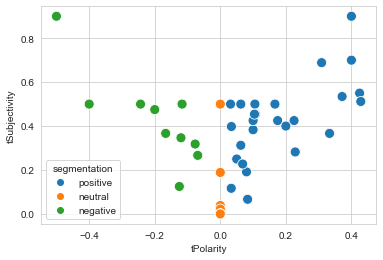

In [ ]:
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<AxesSubplot:xlabel='segmentation', ylabel='count'>

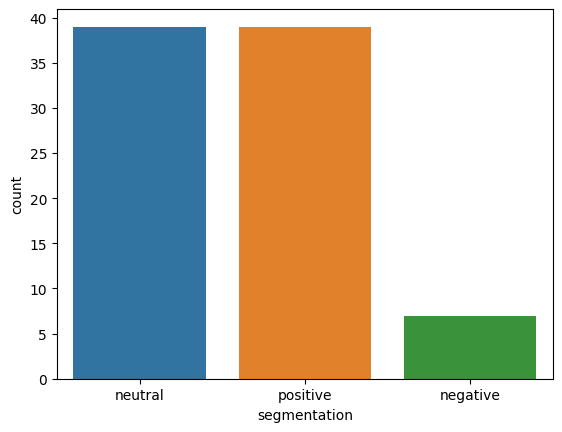

In [ ]:
sns.countplot(data=df,x='segmentation')

In [ ]:
positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['Enjoyed','Unfavored','notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,Enjoyed,45.9
1,Unfavored,8.2
2,notSure,45.9
